In [37]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important;}</style>"))

%load_ext autoreload
%autoreload 2

import WaitingUtils as wu
import pandas as pd
from collections import Counter
import matplotlib as plt
import numpy as np

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
average_arrival_time = 3.75
average_service_time = 3
time_period = 1


## Draw inter-Arrival Time
We expect the histogram to show a Poisson distribution with average arrival time 

In [39]:
help(wu.draw_inter_arrival_time)

Help on function draw_inter_arrival_time in module WaitingUtils:

draw_inter_arrival_time(average_arrival_time, time_period)
    # next arrival time after this arrived (time between) 【when will next customer come after this one】



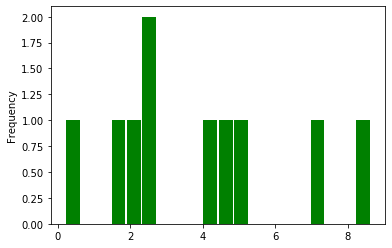

In [40]:
no_of_trials = 10
def try_out_inter_arrival_time(trials):
    values = []
    for i in range(trials):
        draw = wu.draw_inter_arrival_time(average_arrival_time, time_period)
        values.append(draw)
    return values

simulated_inter_arrival_time = try_out_inter_arrival_time(no_of_trials)

simulated_inter_arrival_time_data_frame = pd.DataFrame(simulated_inter_arrival_time, columns=['coll'])
simulated_inter_arrival_time_data_frame.coll.plot.hist(grid=False, bins=20, color='green', zorder=2, rwidth=0.9)
        
        

## Draw service time
We expect the histogram to show a exponential distribution with average service time



In [41]:
help(wu.draw_service_time)

Help on function draw_service_time in module WaitingUtils:

draw_service_time(average_service_time, time_period)
    # time duration that customer being serviced



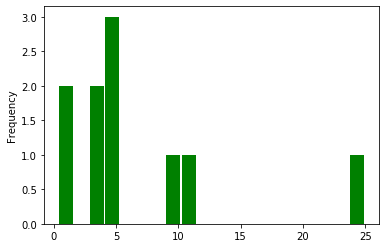

In [42]:
no_of_trials = 10
def try_out_service_time(trials):
    values = []
    for i in range(trials):
        draw = wu.draw_service_time(average_service_time, time_period)
        values.append(draw)
    return values

simulated_service_time = try_out_inter_arrival_time(no_of_trials)

simulated_service_time_data_frame = pd.DataFrame(simulated_service_time, columns=['coll'])
simulated_service_time_data_frame.coll.plot.hist(grid=False, bins=20, color='green', zorder=2, rwidth=0.9)
        
        

## Calculate Arrival Time

In [43]:
help(wu.calculate_arrival_time)

Help on function calculate_arrival_time in module WaitingUtils:

calculate_arrival_time(previous_arrival_time, inter_arrival_time)
    # last arrival time + inter arrival time



In [44]:
previous_arrival_time = 0
inter_arrival_time = 3.75
print('{:,.2f}'.format(wu.calculate_arrival_time(previous_arrival_time, inter_arrival_time)))



3.75


## Calculate Service Start Time Single

In [45]:
help(wu.calculate_service_start_time_single)

Help on function calculate_service_start_time_single in module WaitingUtils:

calculate_service_start_time_single(agent_available_time, arrival_time)
    # service start depends on， agent available and and customer arrival time, which comes later



In [46]:
agent_available_time = 0
arrival_time = 3.75
print('{:,.2f}'.format(wu.calculate_service_start_time_single(agent_available_time, arrival_time)))



3.75


## Calculate Service Start Time Double

In [47]:
help(wu.calculate_service_start_time_double)

Help on function calculate_service_start_time_double in module WaitingUtils:

calculate_service_start_time_double(agent_one_available, agent_two_available, arrival_time)
    # first see which agent is available, and see when does customer come



In [48]:
agent_one_available = 3
agent_two_available = 0
arrival_time = 3.75
print('{:,.2f}'.format(wu.calculate_service_start_time_double(agent_one_available, agent_two_available, arrival_time)))


3.75


## Calculate Service Start Time Triple

In [49]:
help(wu.calculate_service_start_time_triple)

Help on function calculate_service_start_time_triple in module WaitingUtils:

calculate_service_start_time_triple(agent_tri_one_available, agent_tri_two_available, agent_tri_three_available, arrival_time)



In [50]:
agent_tri_one_available = 3
agent_tri_two_available = 5
agent_tri_three_available = 0
arrival_time = 3.75
print('{:,.2f}'.format(wu.calculate_service_start_time_triple(agent_tri_one_available, agent_tri_two_available, agent_tri_three_available, arrival_time)))


3.75


## Calculate Waiting Time

In [51]:
help(wu.calculate_waiting_time)

Help on function calculate_waiting_time in module WaitingUtils:

calculate_waiting_time(arrival_time, service_start_time)
    # waiting time in line



In [52]:
service_start_time = 3.75
print('{:,.2f}'.format(wu.calculate_waiting_time(arrival_time, service_start_time)))


0.00


## Calculate Completion Time

In [53]:
help(wu.calculate_completion_time)

Help on function calculate_completion_time in module WaitingUtils:

calculate_completion_time(service_start_time, service_time)
    # call finish time



In [54]:
service_time = 3
print('{:,.2f}'.format(wu.calculate_completion_time(service_start_time, service_time)))

6.75


## Calculate Time in System

In [55]:
help(wu.calculate_time_in_system)

Help on function calculate_time_in_system in module WaitingUtils:

calculate_time_in_system(completion_time, arrival_time)
    # how long does it take from call start to finish



In [56]:
completion_time = 6.75
print('{:,.2f}'.format(wu.calculate_time_in_system(completion_time, arrival_time)))

3.00


## Calculate When Agent Available (Single Model)

In [57]:
help(wu.calculate_when_agent_available)

Help on function calculate_when_agent_available in module WaitingUtils:

calculate_when_agent_available(completion_time)
    # in single model，when does agent being available



In [58]:
completion_time = 6.75
print('{:,.2f}'.format(wu.calculate_when_agent_available(completion_time)))

6.75


## Calculate When Agent One Available (Double Model)

In [59]:
help(wu.calculate_when_agent_one_available)

Help on function calculate_when_agent_one_available in module WaitingUtils:

calculate_when_agent_one_available(previous_agent_one_available, previous_agent_two_available, completion_time)
    # in double model，when does agent 1 being available



In [60]:
previous_agent_one_available = 3
previous_agent_two_available = 6.75
print('{:,.2f}'.format(wu.calculate_when_agent_one_available(previous_agent_one_available, previous_agent_two_available,completion_time)))



6.75


## Calculate When Agent Two Available (Double Model)

In [61]:
help(wu.calculate_when_agent_two_available)

Help on function calculate_when_agent_two_available in module WaitingUtils:

calculate_when_agent_two_available(previous_agent_one_available, previous_agent_two_available, completion_time)
    # in double model, when does agent 2 being available



In [62]:
previous_agent_one_available = 3
previous_agent_two_available = 6.75
print('{:,.2f}'.format(wu.calculate_when_agent_two_available(previous_agent_one_available, previous_agent_two_available,completion_time)))


6.75


## Calculate When Agent Tri-One Available (Triple Model)

In [63]:
help(wu.calculate_when_agent_tri_one_available)

Help on function calculate_when_agent_tri_one_available in module WaitingUtils:

calculate_when_agent_tri_one_available(previous_agent_tri_one_available, previous_agent_tri_two_available, previous_agent_tri_three_available, completion_time)
    # in triple model，when does agent 1 being available



In [64]:
previous_agent_tri_one_available = 3
previous_agent_tri_two_available = 6.75
previous_agent_tri_three_available = 0
print('{:,.2f}'.format(wu.calculate_when_agent_tri_one_available(previous_agent_tri_one_available, 
                                                                previous_agent_tri_two_available,
                                                                previous_agent_tri_three_available,
                                                                completion_time)))


3.00


## Calculate When Agent Tri-Two Available (Triple Model)

In [65]:
help(wu.calculate_when_agent_tri_two_available)

Help on function calculate_when_agent_tri_two_available in module WaitingUtils:

calculate_when_agent_tri_two_available(previous_agent_tri_one_available, previous_agent_tri_two_available, previous_agent_tri_three_available, completion_time)
    # in triple model，when does agent 2 being available



In [66]:
previous_agent_tri_one_available = 3
previous_agent_tri_two_available = 6.75
previous_agent_tri_three_available = 0
print('{:,.2f}'.format(wu.calculate_when_agent_tri_two_available(previous_agent_tri_one_available, 
                                                                previous_agent_tri_two_available,
                                                                previous_agent_tri_three_available,
                                                                completion_time)))

6.75


## Calculate When Agent Tri-Three Available (Triple Model)

In [67]:
help(wu.calculate_when_agent_tri_three_available)

Help on function calculate_when_agent_tri_three_available in module WaitingUtils:

calculate_when_agent_tri_three_available(previous_agent_tri_one_available, previous_agent_tri_two_available, previous_agent_tri_three_available, completion_time)
    # in triple model，when does agent 3 being available



In [68]:
previous_agent_tri_one_available = 3
previous_agent_tri_two_available = 6.75
previous_agent_tri_three_available = 0
print('{:,.2f}'.format(wu.calculate_when_agent_tri_three_available(previous_agent_tri_one_available, 
                                                                previous_agent_tri_two_available,
                                                                previous_agent_tri_three_available,
                                                                completion_time)))

6.75


## Run Simulation Single 
Simulates 10 output instances. Simlated output should be reasonable given the base, best, and worst case with one agent 

In [69]:
time_period = 1
number_of_customer_simulated = 10
warm_up_phase_duration = 5
print(wu.run_simulation_single(average_arrival_time, average_service_time, 
                              time_period, number_of_customer_simulated,
                              warm_up_phase_duration, agent_start_time = 0))

{0: ['inter_arrival_time', 'arrival_time', 'service_start_time', 'waiting_time', 'service_time', 'completion_time', 'time_in_system', 'agent_available_time'], 5: [0.1746340840691997, 28.443076421079926, 31.827504874113227, 3.3844284530333013, 3.065258625843025, 34.89276349995625, 6.449687078876327, 34.89276349995625], 6: [0.0410247467900681, 28.484101167869994, 34.89276349995625, 6.408662332086259, 0.9567843574354832, 35.849547857391734, 7.36544668952174, 35.849547857391734], 7: [12.0350022892802, 40.519103457150194, 40.519103457150194, 0.0, 3.8323048908421646, 44.35140834799236, 3.832304890842167, 44.35140834799236], 8: [10.50627804686276, 51.025381504012955, 51.025381504012955, 0.0, 1.218270926355287, 52.24365243036824, 1.218270926355288, 52.24365243036824], 9: [7.338903435107041, 58.36428493912, 58.36428493912, 0.0, 0.10311372538109764, 58.4673986645011, 0.10311372538109964, 58.4673986645011]}


## Run Simulation Double
Simulates 10 output instances. Simlated output should be reasonable given the base, best, and worst case with double agents (two agents)

In [70]:
time_period = 1
number_of_customer_simulated = 10
warm_up_phase_duration = 5
print(wu.run_simulation_double(average_arrival_time,average_service_time,time_period, 
                                number_of_customer_simulated,warm_up_phase_duration,
                                agent_two_start_time = 0))

{0: ['inter_arrival_time', 'arrival_time', 'service_start_time', 'waiting_time', 'service_time', 'completion_time', 'time_in_system', 'agent_one_available', 'agent_two_available'], 5: [5.62846335838603, 22.913810637555706, 22.913810637555706, 0.0, 0.4737773202666047, 23.387587957822312, 0.47377732026660624, 23.387587957822312, 21.76582308840748], 6: [7.643511883973248, 30.557322521528953, 30.557322521528953, 0.0, 7.720433705227625, 38.27775622675658, 7.720433705227627, 23.387587957822312, 38.27775622675658], 7: [6.055815272579582, 36.61313779410853, 36.61313779410853, 0.0, 4.640185455606183, 41.25332324971471, 4.640185455606179, 41.25332324971471, 38.27775622675658], 8: [2.0120481063390443, 38.625185900447576, 38.625185900447576, 0.0, 1.2195579457342787, 39.844743846181856, 1.2195579457342802, 41.25332324971471, 39.844743846181856], 9: [9.854714262132031, 48.47990016257961, 48.47990016257961, 0.0, 1.8949574467632928, 50.374857609342904, 1.8949574467632928, 41.25332324971471, 50.3748576

## Run Simulation Triple
Simulates 10 output instances. Simlated output should be reasonable given the base, best, and worst case with triple agents (three agents)


In [71]:
time_period = 1
number_of_customer_simulated = 10
warm_up_phase_duration = 5
print(wu.run_simulation_triple(average_arrival_time, 
                            average_service_time, 
                            time_period, 
                            number_of_customer_simulated,
                            warm_up_phase_duration,
                            agent_tri_three_start_time = 0))

{0: ['inter_arrival_time', 'arrival_time', 'service_start_time', 'waiting_time', 'service_time', 'completion_time', 'time_in_system', 'agent_tri_one_available', 'agent_tri_two_available', 'agent_tri_three_available'], 5: [2.2880540626810446, 6.331259203883622, 6.331259203883622, 0.0, 0.5309104353557432, 6.862169639239365, 0.530910435355743, 6.3476479427758274, 8.026667229881877, 6.862169639239365], 6: [5.790824966080465, 12.122084169964086, 12.122084169964086, 0.0, 0.049567565239545607, 12.171651735203632, 0.04956756523954553, 12.171651735203632, 8.026667229881877, 6.862169639239365], 7: [1.2771852598139537, 13.399269429778041, 13.399269429778041, 0.0, 2.498141016954099, 15.89741044673214, 2.498141016954099, 12.171651735203632, 8.026667229881877, 15.89741044673214], 8: [9.077142221344259, 22.476411651122298, 22.476411651122298, 0.0, 0.8611656034584001, 23.337577254580697, 0.8611656034583994, 12.171651735203632, 23.337577254580697, 15.89741044673214], 9: [0.8358808240502819, 23.31229247